##                                                                            Wisconsin Breast Cancer Dataset

* I have downloaded this Breast Cancer datasets from UCI machine learning 
repository maintained by the University of California, Irvine.
The dataset contains 569 samples of malignant and benign tumor cells.

* The first two columns in the dataset store the unique ID numbers of the samples and the corresponding diagnosis (M=malignant, B=benign), respectively.

* The columns 3-32 contain 30 real-value features that have been computed from digitized images of the cell nuclei, which can be used to build a model to predict whether a tumor is benign or malignant.

1= Malignant (Cancerous) - Present (M)
0= Benign (Not Cancerous) -Absent (B)

* Ten real-valued features are computed for each cell nucleus:

      radius (mean of distances from center to points on the perimeter)

      texture (standard deviation of gray-scale values)

      perimeter

      area

      smoothness (local variation in radius lengths)

      compactness (perimeter^2 / area - 1.0)

      concavity (severity of concave portions of the contour)

      concave points (number of concave portions of the contour)

      symmetry

      fractal dimension ("coastline approximation" - 1)


* The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Loading the data
df=pd.read_csv('data.csv')

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


The last column named "Unaname: 32" seems like an erronous coloumn in our dataset. We might probably just drop it.

Most of the columns seem to have a numeric entry. This would save our time from mapping the variables.

The ID column would not help us contributing to predict about the cancer. We might as well drop it.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Only the 'diagnosis' column, which we have to predict is of object datatype.

There's only ID column of int type. We will probably drop it anyway.

There are a total of 31 columns which are of float datatype

In [ ]:
#To check the null values from the dataset
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

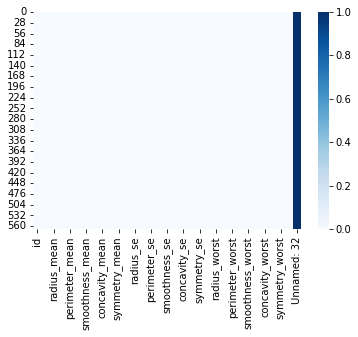

In [ ]:
#Here i have used heatmap to show the null values visually.
sns.heatmap(df.isnull(),cmap='Blues')

In [ ]:
#Here i have dropped the Unnamed: 32 column because it contains maximum null values. 
df.drop('Unnamed: 32', axis=1, inplace=True)

In [ ]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
#Just to check whether our data is balanced or not i have used value_counts.
df["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

Number of Benign:  357
Number of Malignant :  212


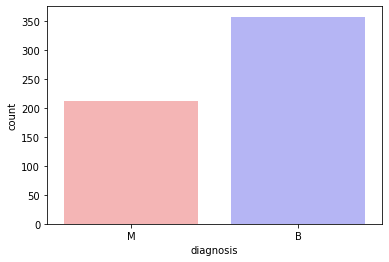

In [ ]:
#Visual representation of the target column, Show the counts of observations in each categorical bin using bars.
cnt_plot= sns.countplot(df["diagnosis"],label="Count",palette='bwr_r')
B, M = df["diagnosis"].value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

In [ ]:
#Here i am dropping the ID column, because it has no use in predicting the cancer.
df.drop("id",inplace=True,axis=1)

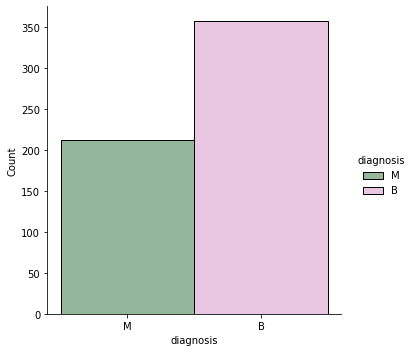

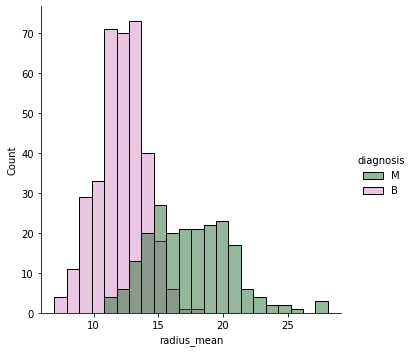

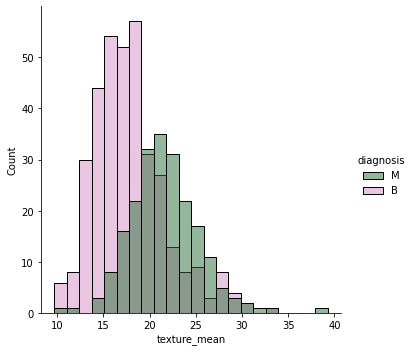

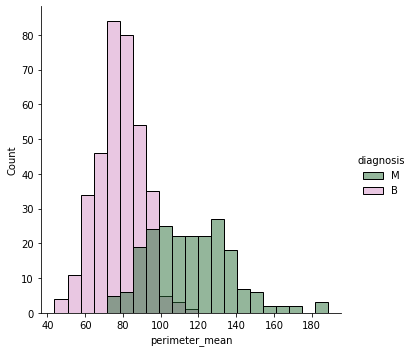

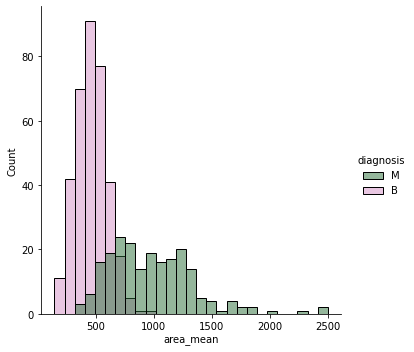

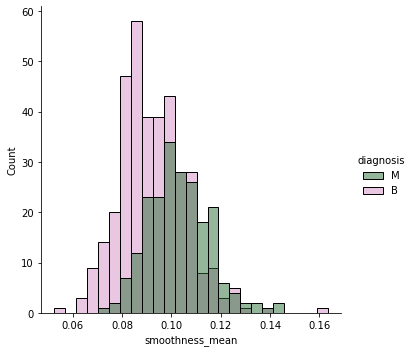

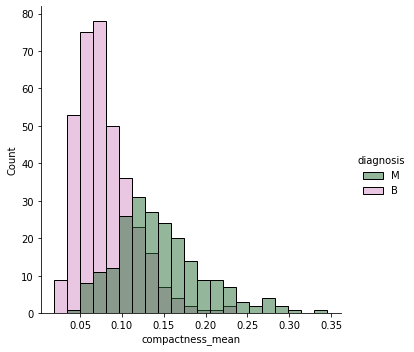

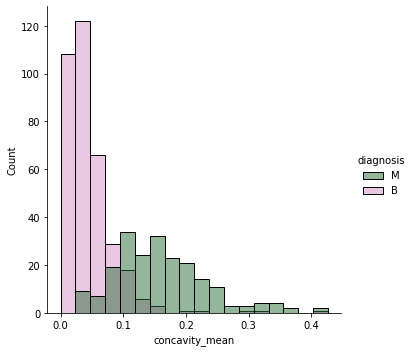

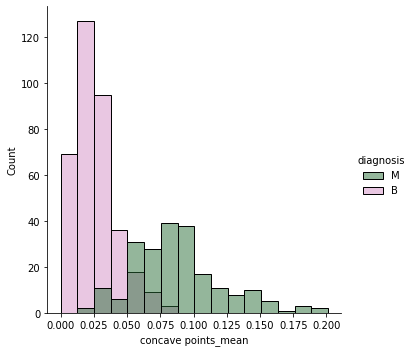

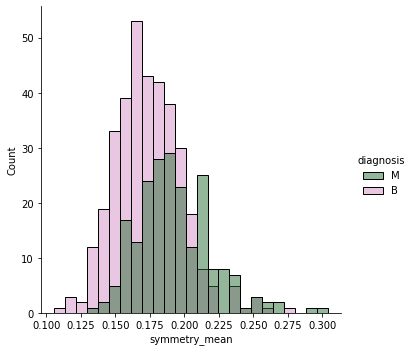

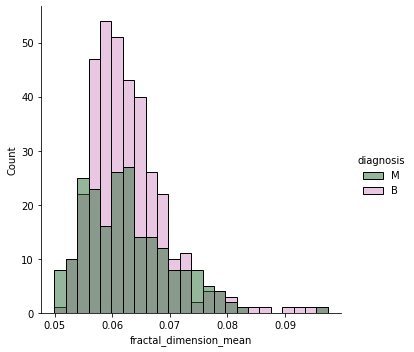

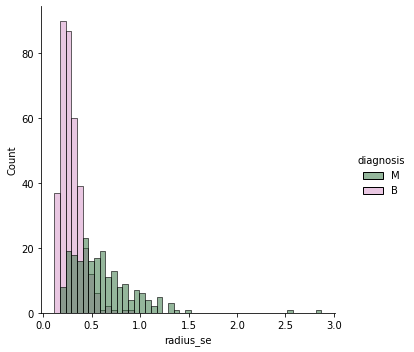

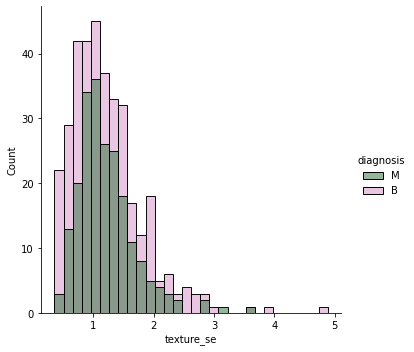

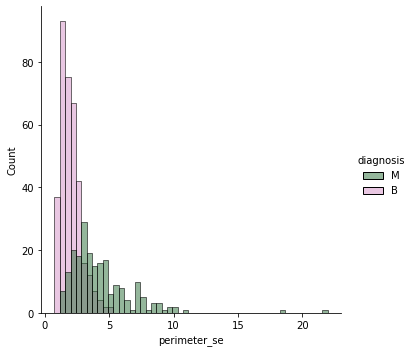

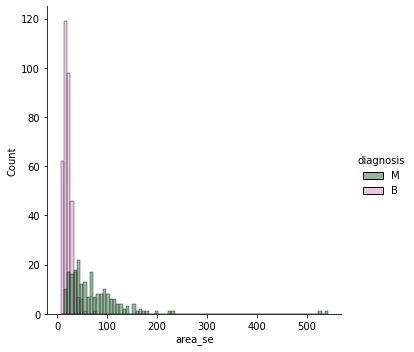

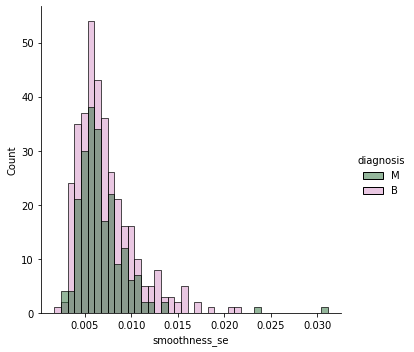

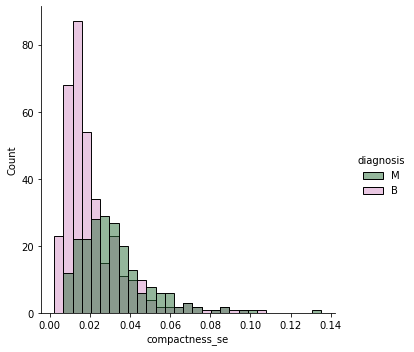

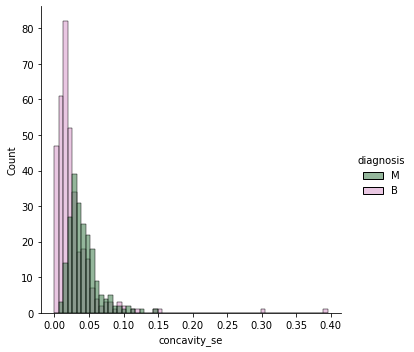

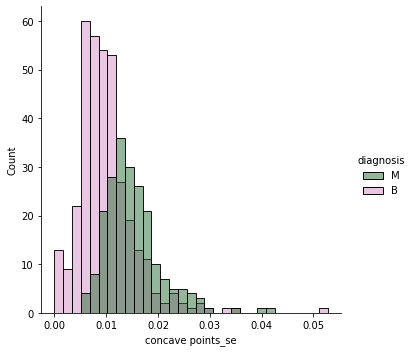

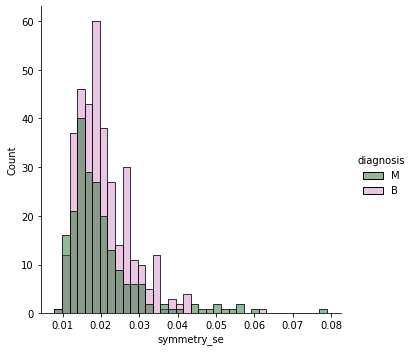

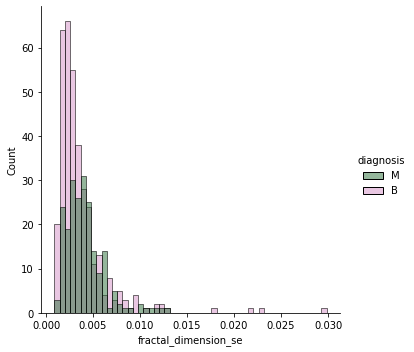

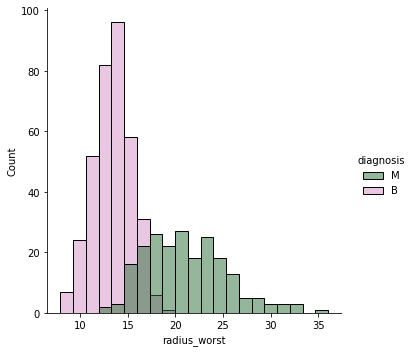

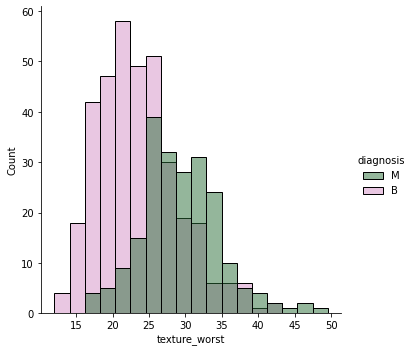

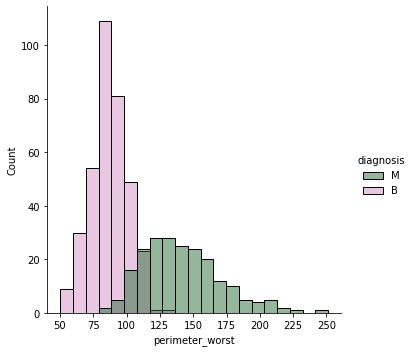

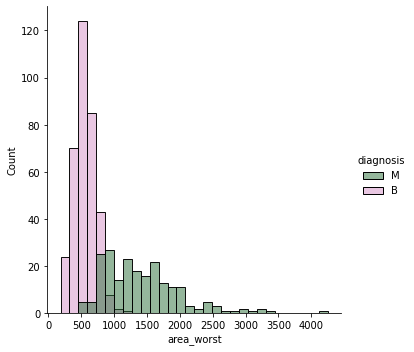

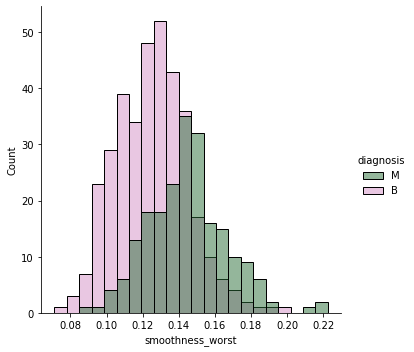

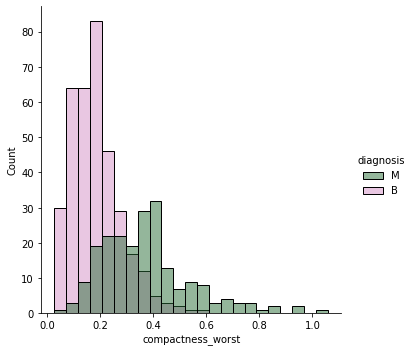

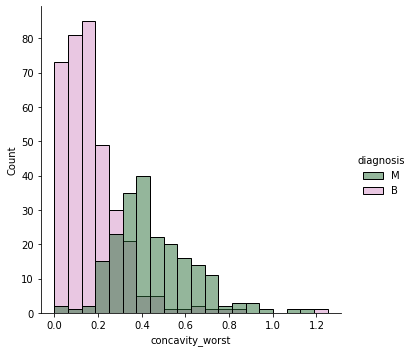

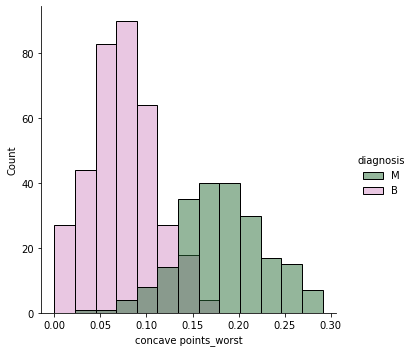

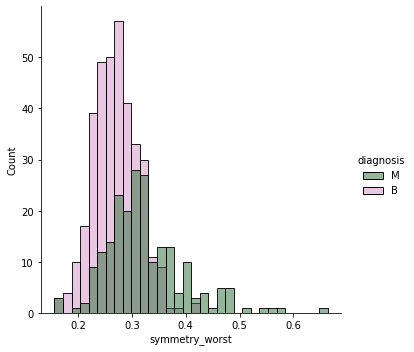

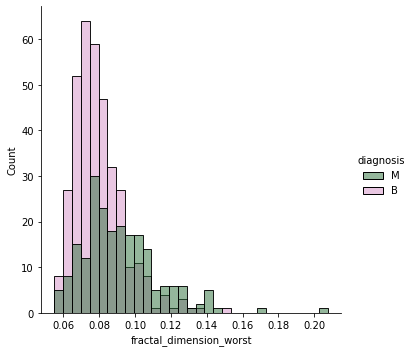

In [ ]:
for i in df:
  #print(i)
  sns.displot(data=df, x=i, hue='diagnosis', palette='cubehelix')
  plt.show()

In [ ]:
#Here i have used Distplot which represents the overall distribution of continuous data variables.and from the representation i got to know that Lower the values of radious mean, perimeter mean, area mean lower the chances of tumor. and higher the values of concavity mean,perimeter_se,area mean higher the chances of tumor.

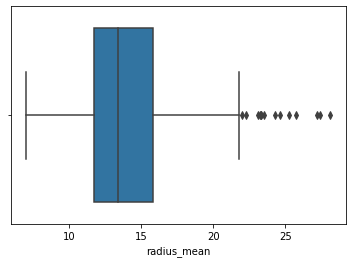

In [ ]:
#Let us see if there are any outliers present in the dataset
sns.boxplot(df['radius_mean'])

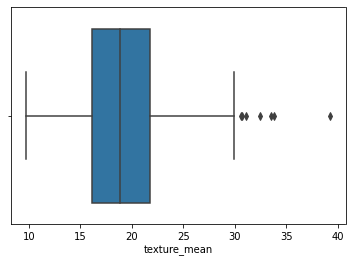

In [ ]:
sns.boxplot(df['texture_mean'])

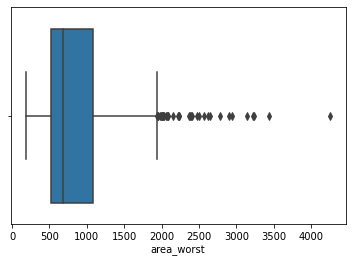

In [ ]:
sns.boxplot(df['area_worst'])


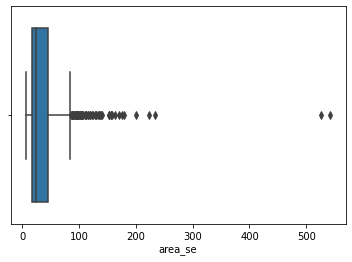

In [ ]:
sns.boxplot(df['area_se'])

In [ ]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


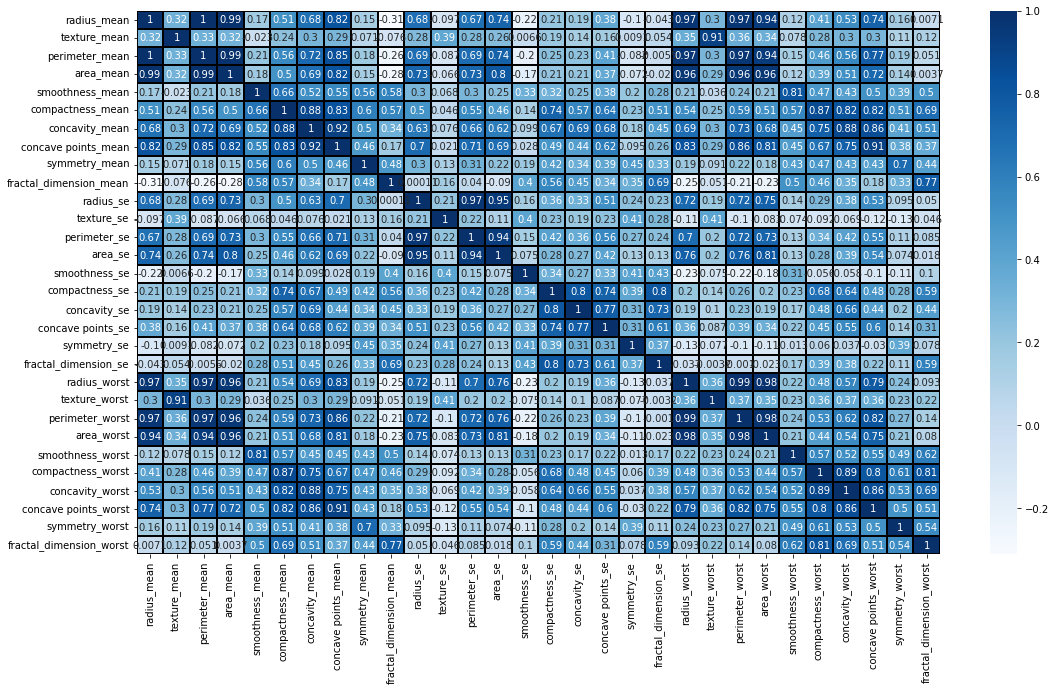

In [ ]:
#I have plotted heatmap which contains values representing various shades of the same colour for each value to be plotted. Usually the darker shades of the chart represent higher values than the lighter shade. For a very different value a completely different colour can also be used.
plt.figure(figsize = (18, 10))
sns.heatmap(df.corr(),cmap='Blues',linewidths=1,linecolor='black',annot=True)

## Seperating Independent and Dependent columns

In [ ]:
x=df.drop(['diagnosis'],axis=1)
x

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
y=df.diagnosis.replace({'B':0,'M':1})
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

## Splitting Data into training and testing

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

When we create the artificial neural network then we have to scale the data into smaller numbers because the deep learning algorithms multiplies the weights and input data of the nodes and takes lots of time,so for reducing that time we have to scale the data. For scaling i have used standard scaler,we scale the training and testing dataset.


In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)

#xtrain = (xtrain-xtrain.mean())/(xtrain.max()-xtrain.min())
#xtest = (xtest-xtest.mean())/(xtest.max()-xtest.min())

Here i have used relu as activation function for input and hidden layer and for the output layer i have used sigmoid function.
I have used Dropout to drop some of the neurons to avoid overfitting.
I have used adam optimizer and have took the number of epochs 101.

In [ ]:
from tensorflow.keras.layers import Dropout

model = Sequential()

model.add(Dense(7,activation='relu')) #Input layer (Number of features - 1(label))
model.add(Dropout(rate=0.2))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='sigmoid')) #Output layer (Since it's a binary classification problem)

#Using accuracy as loss function
model.compile(optimizer='adam',loss='binary_crossentropy')

model.fit(xtrain,ytrain,epochs=101,validation_data=(xtest, ytest))

Epoch 1/101
13/13 [==============================] - 1s 17ms/step - loss: 0.5558 - val_loss: 0.5310
Epoch 2/101
13/13 [==============================] - 0s 6ms/step - loss: 0.4892 - val_loss: 0.4853
Epoch 3/101
13/13 [==============================] - 0s 6ms/step - loss: 0.4620 - val_loss: 0.4427
Epoch 4/101
13/13 [==============================] - 0s 4ms/step - loss: 0.4199 - val_loss: 0.3988
Epoch 5/101
13/13 [==============================] - 0s 5ms/step - loss: 0.3985 - val_loss: 0.3615
Epoch 6/101
13/13 [==============================] - 0s 6ms/step - loss: 0.3549 - val_loss: 0.3293
Epoch 7/101
13/13 [==============================] - 0s 6ms/step - loss: 0.3285 - val_loss: 0.2994
Epoch 8/101
13/13 [==============================] - 0s 5ms/step - loss: 0.2753 - val_loss: 0.2746
Epoch 9/101
13/13 [==============================] - 0s 6ms/step - loss: 0.2604 - val_loss: 0.2533
Epoch 10/101
13/13 [==============================] - 0s 5ms/step - loss: 0.2501 - val_loss: 0.2353
Epoch 11

In [ ]:
model.history.history

{'loss': [0.5557825565338135,
  0.48920106887817383,
  0.4619528353214264,
  0.4198637902736664,
  0.39848434925079346,
  0.3549477756023407,
  0.32853636145591736,
  0.27525612711906433,
  0.26039981842041016,
  0.2501175105571747,
  0.23085804283618927,
  0.2054007202386856,
  0.19278362393379211,
  0.1954837143421173,
  0.1789172887802124,
  0.17560523748397827,
  0.17123045027256012,
  0.146315336227417,
  0.139335498213768,
  0.132916659116745,
  0.12495531886816025,
  0.1259201616048813,
  0.11311553418636322,
  0.11972784250974655,
  0.11672370135784149,
  0.11603568494319916,
  0.11157575249671936,
  0.1114751547574997,
  0.10278356820344925,
  0.09159580618143082,
  0.09688545018434525,
  0.11052699387073517,
  0.09619022905826569,
  0.07918830960988998,
  0.08867878466844559,
  0.10139792412519455,
  0.08584075421094894,
  0.07518027722835541,
  0.07820931822061539,
  0.08414587378501892,
  0.06919842958450317,
  0.07557827234268188,
  0.07577986270189285,
  0.075543634593486

Training and Validation loss visual representation:
The purpose of this is to diagnose the model’s performance and identify which aspects need tuning.

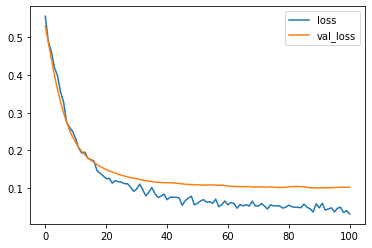

In [ ]:
lossdf=pd.DataFrame(model.history.history)
lossdf.plot()

We can set a threshold value to classify all the values greater than threshold as 1 and lesser then that as 0.

In [ ]:
ypred=model.predict(xtest)
ypred=ypred>0.2

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       108
           1       0.92      0.97      0.95        63

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



From the classification report we can see the accuracy=96%, and F1score for 0 and 1 is 97% and 95% respectively.

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,ypred)

array([[103,   5],
       [  2,  61]])

Graphical reprentation of Confusion Metrics

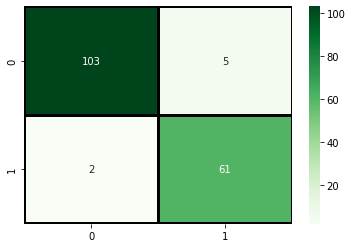

In [ ]:
sns.heatmap(confusion_matrix(ytest,ypred), annot=True,cmap='Greens',fmt='g',linewidth=2,linecolor='black')